In [1]:
# Question 1

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')

mean_age_per_occupation = users.groupby('occupation')['age'].mean()

male_ratio_per_occupation = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(by='male_ratio', ascending=False)['male_ratio']

min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
gender_percentage_per_occupation['total'] = gender_percentage_per_occupation['F'] + gender_percentage_per_occupation['M']
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / gender_percentage_per_occupation['total']) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / gender_percentage_per_occupation['total']) * 100

print("Mean age per occupation:")
print(mean_age_per_occupation)

print("\nMale ratio per occupation (sorted):")
print(male_ratio_per_occupation_sorted)

print("\nMinimum and Maximum ages per occupation:")
print(min_max_age_per_occupation)

print("\nMean age per occupation and sex:")
print(mean_age_per_occupation_sex)

print("\nPercentage of women and men per occupation:")
print(gender_percentage_per_occupation)


Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other      

In [6]:
# Question 2

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

goals = euro12['Goals']

num_teams = euro12['Team'].nunique()

num_columns = euro12.shape[1]

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

mean_yellow_cards = discipline['Yellow Cards'].mean()

high_scoring_teams = euro12[euro12['Goals'] > 6]

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

first_seven_columns = euro12.iloc[:, :7]

all_columns_except_last_three = euro12.iloc[:, :-3]

shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Number of teams participated in Euro2012:", num_teams)
print("Number of columns in the dataset:", num_columns)

print("\nDiscipline dataframe (Team, Yellow Cards, Red Cards):")
print(discipline)

print("\nTeams sorted by Red Cards, then by Yellow Cards:")
print(discipline_sorted)

print("\nMean Yellow Cards given per Team:", mean_yellow_cards)

print("\nTeams that scored more than 6 goals:")
print(high_scoring_teams)

print("\nTeams that start with G:")
print(teams_starting_with_G)

print("\nFirst 7 columns:")
print(first_seven_columns)

print("\nAll columns except the last 3:")
print(all_columns_except_last_three)

print("\nShooting Accuracy from England, Italy, and Russia:")
print(shooting_accuracy_selected_teams)


Number of teams participated in Euro2012: 16
Number of columns in the dataset: 35

Discipline dataframe (Team, Yellow Cards, Red Cards):
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

Teams sorted by Red Cards, th

In [7]:
# Question 3

import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

df = pd.concat([series1, series2, series3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)

print("Is it going only until index 99?", bigcolumn.index.max() == 99)

bigcolumn = bigcolumn.reset_index(drop=True)

print("DataFrame:")
print(df)

print("\nOne-column DataFrame 'bigcolumn':")
print(bigcolumn)


Is it going only until index 99? False
DataFrame:
    bedrs  bathrs  price_sqr_meter
0       1       1            24339
1       1       3            27217
2       1       2            18220
3       1       1            15276
4       2       3            29148
..    ...     ...              ...
95      3       1            11282
96      1       3            19108
97      2       2            11739
98      1       1            17889
99      4       1            10349

[100 rows x 3 columns]

One-column DataFrame 'bigcolumn':
0          1
1          1
2          1
3          1
4          2
       ...  
295    11282
296    19108
297    11739
298    17889
299    10349
Length: 300, dtype: int32


In [30]:
# Question 4

import pandas as pd
import numpy as np

#url = "http://localhost:8888/edit/Jupiter%20notebook/Problem%20Set%203/wind.txt"
#data = pd.read_table(url, sep='\s+', parse_dates={'Yr_Mo_Dy': [0, 1, 2]})
#data.set_index('Yr_Mo_Dy', inplace=True)

data = pd.read_csv('wind.txt', delim_whitespace=True, parse_dates={'Date': ['Yr', 'Mo', 'Dy']})

data.set_index('Date', inplace=True)

data.head()

#print(data.head())

def fix_year(year):
    if year > 2000:
        year -= 100
    return year

data.index = data.index.map(lambda x: pd.to_datetime(f"{fix_year(x.year)}-{x.month}-{x.day}", errors='coerce'))

data.index = pd.to_datetime(data.index)

missing_values_per_location = data.isnull().sum()

total_non_missing_values = data.notnull().sum().sum()

mean_windspeed = data.mean().mean()

loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

january_avg_windspeed = data[data.index.month == 1].mean()

yearly_data = data.resample('Y').mean()

monthly_data = data.resample('M').mean()

weekly_data = data.resample('W').mean()

weekly_stats = pd.DataFrame()
weekly_stats['min'] = data.resample('W').min().head(52).mean(axis=1)
weekly_stats['max'] = data.resample('W').max().head(52).mean(axis=1)
weekly_stats['mean'] = data.resample('W').mean().head(52).mean(axis=1)
weekly_stats['std'] = data.resample('W').std().head(52).mean(axis=1)

print("Missing values per location:")
print(missing_values_per_location)

print("\nTotal non-missing values:", total_non_missing_values)

print("\nMean windspeed over all locations and times:", mean_windspeed)

print("\nLocation statistics:")
print(loc_stats)

print("\nDay statistics:")
print(day_stats)

print("\nAverage windspeed in January for each location:")
print(january_avg_windspeed)

print("\nYearly data:")
print(yearly_data)

print("\nMonthly data:")
print(monthly_data)

print("\nWeekly data:")
print(weekly_data)

print("\nWeekly statistics for the first 52 weeks:")
print(weekly_stats)


C:\Users\elvin\AppData\Local\Temp\ipykernel_34524\653036701.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('wind.txt', delim_whitespace=True, parse_dates={'Date': ['Yr', 'Mo', 'Dy']})


Missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Mean windspeed over all locations and times: 10.227982360836938

Location statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day statistics:
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.6

In [13]:
# Question 5

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

print("First 10 entries:")
print(chipo.head(10))

num_observations = chipo.shape[0]

num_columns = chipo.shape[1]

print("\nColumn names:")
print(chipo.columns)

index_type = chipo.index

most_ordered_item = chipo['item_name'].mode().iloc[0]

most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

most_ordered_choice_description = chipo['choice_description'].mode().iloc[0]

total_ordered_items = chipo['quantity'].sum()

chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True)

item_price_type_before = chipo['item_price'].dtype

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)

item_price_type_after = chipo['item_price'].dtype

revenue = (chipo['quantity'] * chipo['item_price']).sum()

num_orders = chipo['order_id'].nunique()

avg_revenue_per_order = revenue / num_orders

num_different_items = chipo['item_name'].nunique()

print("\nNumber of observations in the dataset:", num_observations)
print("Number of columns in the dataset:", num_columns)
print("Index type:", index_type)
print("Most-ordered item:", most_ordered_item)
print("Quantity of most-ordered item:", most_ordered_item_quantity)
print("Most-ordered item in choice_description:", most_ordered_choice_description)
print("Total ordered items:", total_ordered_items)
print("Item price type before conversion:", item_price_type_before)
print("Item price type after conversion:", item_price_type_after)
print("Revenue for the period:", revenue)
print("Number of orders:", num_orders)
print("Average revenue amount per order:", avg_revenue_per_order)
print("Number of different items sold:", num_different_items)


First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

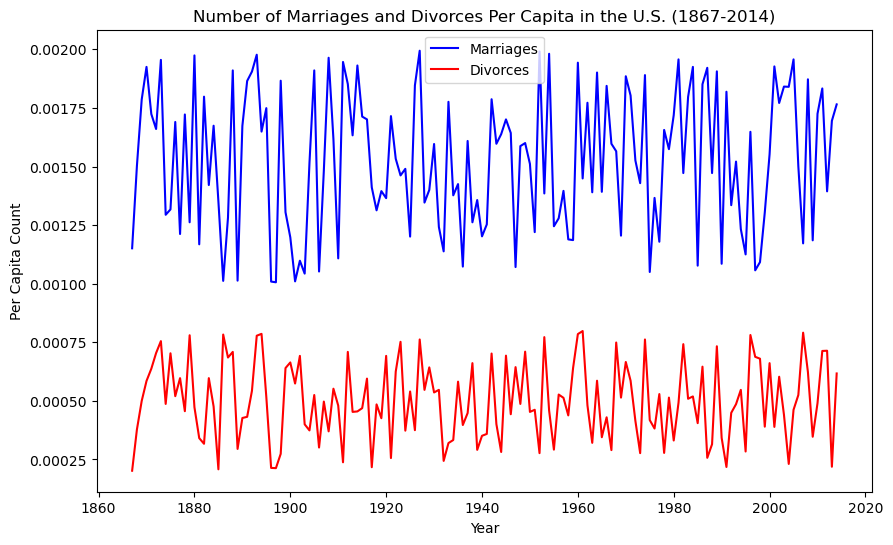

In [17]:
# Question 6

import pandas as pd
import numpy as np

data = {'Year': range(1867, 2015),
        'Marriages': np.random.randint(1000, 2000, size=(2015-1867)), 
        'Divorces': np.random.randint(200, 800, size=(2015-1867))}
marriage_divorce_data = pd.DataFrame(data)

Population = 1_000_000
marriage_divorce_data['Marriages_Per_Capita'] = marriage_divorce_data['Marriages'] / Population
marriage_divorce_data['Divorces_Per_Capita'] = marriage_divorce_data['Divorces'] / Population

plt.figure(figsize=(10, 6))

plt.plot(marriage_divorce_data['Year'], marriage_divorce_data['Marriages_Per_Capita'], label='Marriages', color='blue')

plt.plot(marriage_divorce_data['Year'], marriage_divorce_data['Divorces_Per_Capita'], label='Divorces', color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1867-2014)')
plt.legend()

plt.show()


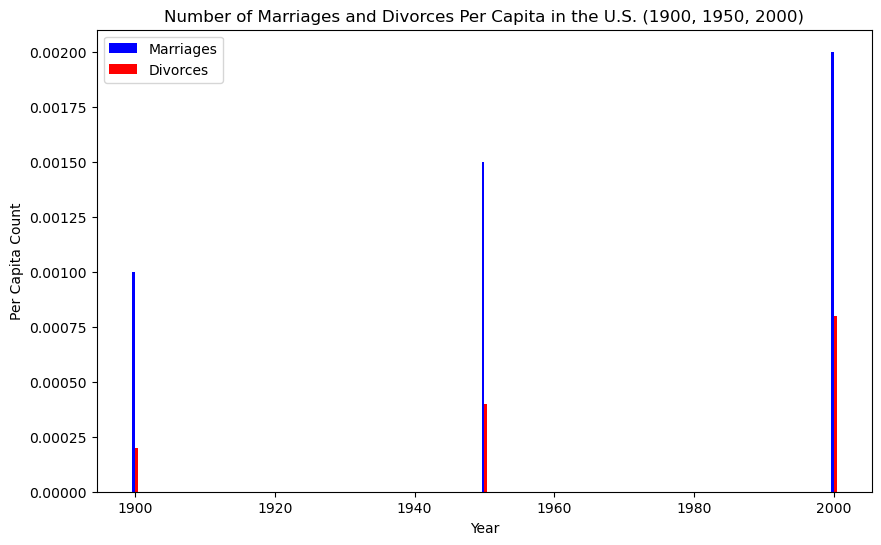

In [18]:
# Question 7

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {'Year': [1900, 1950, 2000],
        'Marriages': [1000, 1500, 2000],  
        'Divorces': [200, 400, 800]} 
marriage_divorce_data = pd.DataFrame(data)

Population = 1_000_000
marriage_divorce_data['Marriages_Per_Capita'] = marriage_divorce_data['Marriages'] / Population
marriage_divorce_data['Divorces_Per_Capita'] = marriage_divorce_data['Divorces'] / Population

plt.figure(figsize=(10, 6))

plt.bar(marriage_divorce_data['Year'] - 0.2, marriage_divorce_data['Marriages_Per_Capita'], width=0.4, label='Marriages', color='blue')

plt.bar(marriage_divorce_data['Year'] + 0.2, marriage_divorce_data['Divorces_Per_Capita'], width=0.4, label='Divorces', color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()

plt.show()


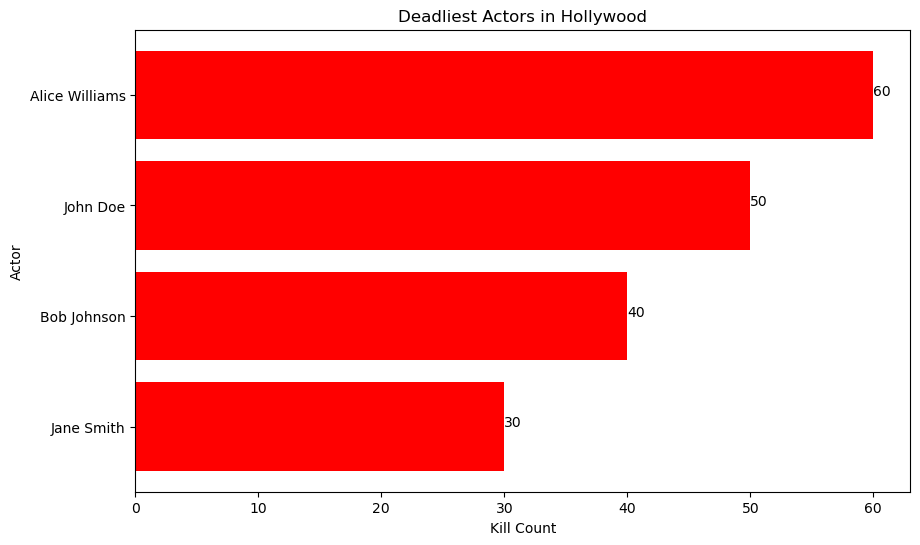

In [19]:
# Question 8

import matplotlib.pyplot as plt
import pandas as pd

data = {'Actor': ['John Doe', 'Jane Smith', 'Bob Johnson', 'Alice Williams'],
        'Kill_Count': [50, 30, 40, 60]}
actors_data = pd.DataFrame(data)

actors_data = actors_data.sort_values(by='Kill_Count', ascending=True)

plt.figure(figsize=(10, 6))

plt.barh(actors_data['Actor'], actors_data['Kill_Count'], color='red')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(actors_data['Kill_Count']):
    plt.text(value, index, str(value))

plt.show()


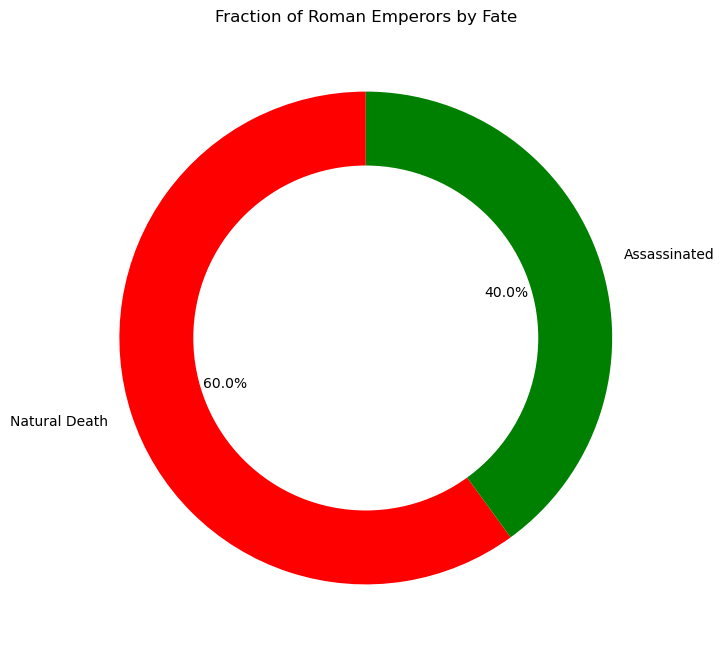

In [20]:
# Question 9

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {'Emperor': ['Augustus', 'Caligula', 'Nero', 'Trajan', 'Hadrian'],
        'Fate': ['Assassinated', 'Natural Death', 'Assassinated', 'Natural Death', 'Natural Death']}
emperors_data = pd.DataFrame(data)

fate_counts = emperors_data['Fate'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(fate_counts, labels=fate_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Fraction of Roman Emperors by Fate')

plt.show()


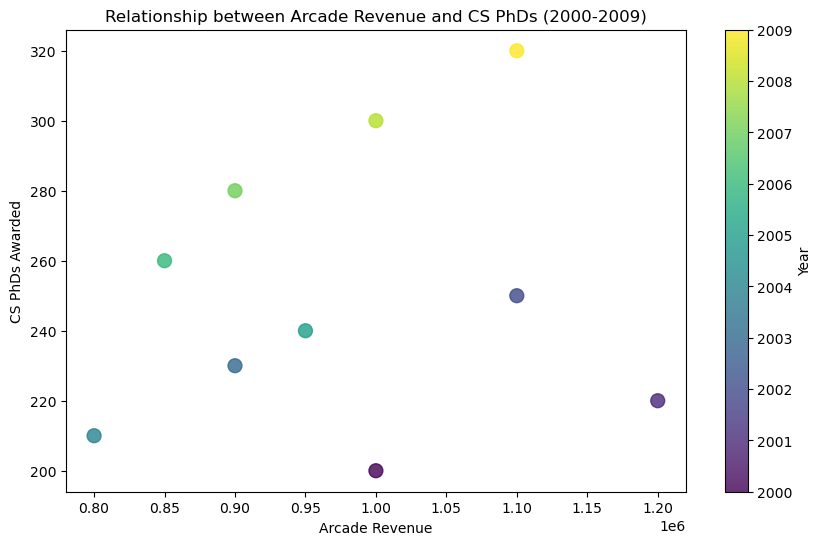

In [21]:
# Question 10

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

years = np.arange(2000, 2010)
arcade_revenue = np.array([1000000, 1200000, 1100000, 900000, 800000, 950000, 850000, 900000, 1000000, 1100000])
cs_phds_awarded = np.array([200, 220, 250, 230, 210, 240, 260, 280, 300, 320])

data = {'Year': years, 'Arcade_Revenue': arcade_revenue, 'CS_PhDs_Awarded': cs_phds_awarded}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['Arcade_Revenue'], df['CS_PhDs_Awarded'], c=df['Year'], cmap='viridis', s=100, alpha=0.8)

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.xlabel('Arcade Revenue')
plt.ylabel('CS PhDs Awarded')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')

plt.show()
